In [7]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
ds = pd.read_csv(r"top10x.csv", usecols=['year','title','artist','top_genre','bpm', 'nrgy', 'dnce', 'dB','live', 'val', 'dur', 'acous', 'spch','pop'])
ds.head()

,title,artist,top_genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [19]:
ds = ds.dropna()
ds.head()

,title,artist,top_genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [20]:
print(ds.columns.values)
ds.isna().head()

['title' 'artist' 'top_genre' 'year' 'bpm' 'nrgy' 'dnce' 'dB' 'live' 'val'
 'dur' 'acous' 'spch' 'pop']


,title,artist,top_genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [21]:
ds[['pop', 'top_genre']].groupby(['top_genre'], as_index=False).mean().sort_values(by='pop', ascending=False)

,top_genre,pop
34,escape room,90.000000
14,brostep,86.000000
2,alternative r&b,84.000000
42,irish singer-songwriter,81.000000
26,danish pop,80.000000
20,celtic rock,80.000000
32,electronic trap,79.500000
29,edm,78.200000
15,canadian contemporary r&b,77.666667
33,electropop,77.461538


In [22]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 603 entries, 0 to 602
Data columns (total 14 columns):
title        603 non-null object
artist       603 non-null object
top_genre    603 non-null object
year         603 non-null int64
bpm          603 non-null int64
nrgy         603 non-null int64
dnce         603 non-null int64
dB           603 non-null int64
live         603 non-null int64
val          603 non-null int64
dur          603 non-null int64
acous        603 non-null int64
spch         603 non-null int64
pop          603 non-null int64
dtypes: int64(11), object(3)
memory usage: 70.7+ KB


In [23]:
labelEncoder = LabelEncoder()
labelEncoder.fit(ds['year'])
labelEncoder.fit(ds['title'])
labelEncoder.fit(ds['artist'])
labelEncoder.fit(ds['top_genre'])
labelEncoder.fit(ds['nrgy'])
labelEncoder.fit(ds['val'])
labelEncoder.fit(ds['dur'])
labelEncoder.fit(ds['pop'])
labelEncoder.fit(ds['spch'])
labelEncoder.fit(ds['live'])
labelEncoder.fit(ds['dnce'])
labelEncoder.fit(ds['bpm'])

ds['year'] = labelEncoder.fit_transform(ds['year'])
ds['title'] = labelEncoder.fit_transform(ds['title'])
ds['artist'] = labelEncoder.fit_transform(ds['artist'])
ds['top_genre'] = labelEncoder.fit_transform(ds['top_genre'])
ds['nrgy'] = labelEncoder.fit_transform(ds['nrgy'])
ds['val'] = labelEncoder.fit_transform(ds['val'])
ds['dur'] = labelEncoder.fit_transform(ds['dur'])
ds['pop'] = labelEncoder.fit_transform(ds['pop'])
ds['spch'] = labelEncoder.fit_transform(ds['spch'])
ds['live'] = labelEncoder.fit_transform(ds['live'])
ds['dnce'] = labelEncoder.fit_transform(ds['dnce'])
ds['bpm'] = labelEncoder.fit_transform(ds['bpm'])

In [24]:
X = np.array(ds.drop(['top_genre'], 1).astype(int))
y = np.array(ds['top_genre'])

In [25]:
kmeans = KMeans(n_clusters = 4, max_iter=100, algorithm = 'auto')

In [26]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

C:\Users\abhis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [27]:
kmeans.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [28]:
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

        print(correct/len(X))
res = kmeans.fit_predict(X)
print(res)

0.001658374792703151
0.003316749585406302
0.004975124378109453
[1 2 0 3 1 3 3 2 1 2 3 2 3 0 1 2 3 0 3 0 2 0 0 2 3 3 2 1 0 3 3 2 3 1 0 2 3
 1 2 3 0 3 1 1 0 2 0 3 3 3 1 3 0 1 1 2 2 2 2 1 0 0 3 2 2 3 2 0 2 1 1 2 0 0
 0 2 0 3 0 1 3 0 1 0 2 0 2 3 1 1 2 3 2 0 1 3 0 0 2 1 2 1 1 2 0 2 2 2 0 1 3
 2 2 0 0 0 0 2 1 1 3 1 0 3 2 3 0 0 0 3 0 1 0 3 3 0 0 1 3 0 0 0 1 1 2 0 3 1
 0 1 3 1 0 3 3 0 0 1 1 3 1 0 2 0 3 3 1 3 1 0 1 0 0 3 1 2 3 2 3 2 0 2 1 2 2
 2 3 1 0 3 1 0 3 0 0 3 3 1 2 3 1 3 2 2 2 2 1 1 2 1 3 0 0 1 2 2 3 1 2 0 1 2
 2 0 2 1 3 2 3 2 1 0 1 0 0 0 2 0 2 3 3 2 3 1 0 1 0 3 2 2 3 3 3 0 0 2 3 3 3
 1 0 0 0 2 3 1 1 2 0 1 0 2 0 0 0 0 1 2 3 0 0 0 2 0 2 1 2 2 3 3 0 3 3 3 2 1
 3 3 0 1 1 3 2 1 2 3 2 1 0 0 2 2 1 1 1 1 1 1 3 0 1 3 0 1 3 2 2 3 3 0 2 1 3
 3 2 3 0 3 2 2 1 1 2 1 3 3 1 3 3 0 3 0 0 0 0 0 2 1 0 2 1 3 1 0 2 3 3 1 1 0
 2 2 3 3 0 2 1 0 0 2 1 3 0 2 1 3 0 2 3 2 1 3 3 0 3 1 3 1 3 1 2 1 3 2 1 2 2
 2 2 0 3 3 1 3 1 2 3 2 0 3 0 1 0 1 3 2 1 0 2 3 3 0 2 1 1 2 3 1 3 3 2 3 2 2
 3 0 0 0 1 1 2 2 0 1 2 0 2 1 2 1 2 3 

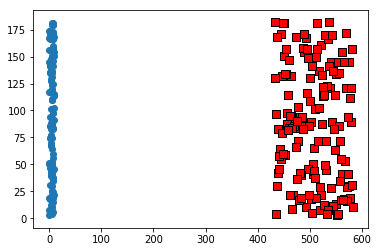

In [40]:
plt.scatter(X[res == 0, 0], X[res == 0, 1], s=50, c='red', marker='s', edgecolor='black', label='cluster 1')
plt.scatter(X[res == 1, 2], X[res == 1, 1])